In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10801,2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
10802,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
10803,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
10804,2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
10805,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


In [4]:
df.shape

(10806, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10806 non-null  object 
 1   Open       10806 non-null  float64
 2   High       10806 non-null  float64
 3   Low        10806 non-null  float64
 4   Close      10806 non-null  float64
 5   Adj Close  10806 non-null  float64
 6   Volume     10806 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 591.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10806.0,1.933131e+01,4.055035e+01,0.049665,2.935270e-01,5.051785e-01,1.862009e+01,1.962400e+02
High,10806.0,1.954623e+01,4.101249e+01,0.049665,3.013390e-01,5.133930e-01,1.881027e+01,1.982300e+02
Low,10806.0,1.912433e+01,4.011902e+01,0.049107,2.857140e-01,4.965405e-01,1.847634e+01,1.952800e+02
Close,10806.0,1.934351e+01,4.058438e+01,0.049107,2.935828e-01,5.059820e-01,1.864205e+01,1.964500e+02
Adj Close,10806.0,1.861440e+01,4.021445e+01,0.038050,2.410182e-01,4.151250e-01,1.622517e+01,1.961851e+02
Volume,10806.0,3.226514e+08,3.366281e+08,0.000000,1.170887e+08,2.105600e+08,4.027520e+08,7.421641e+09


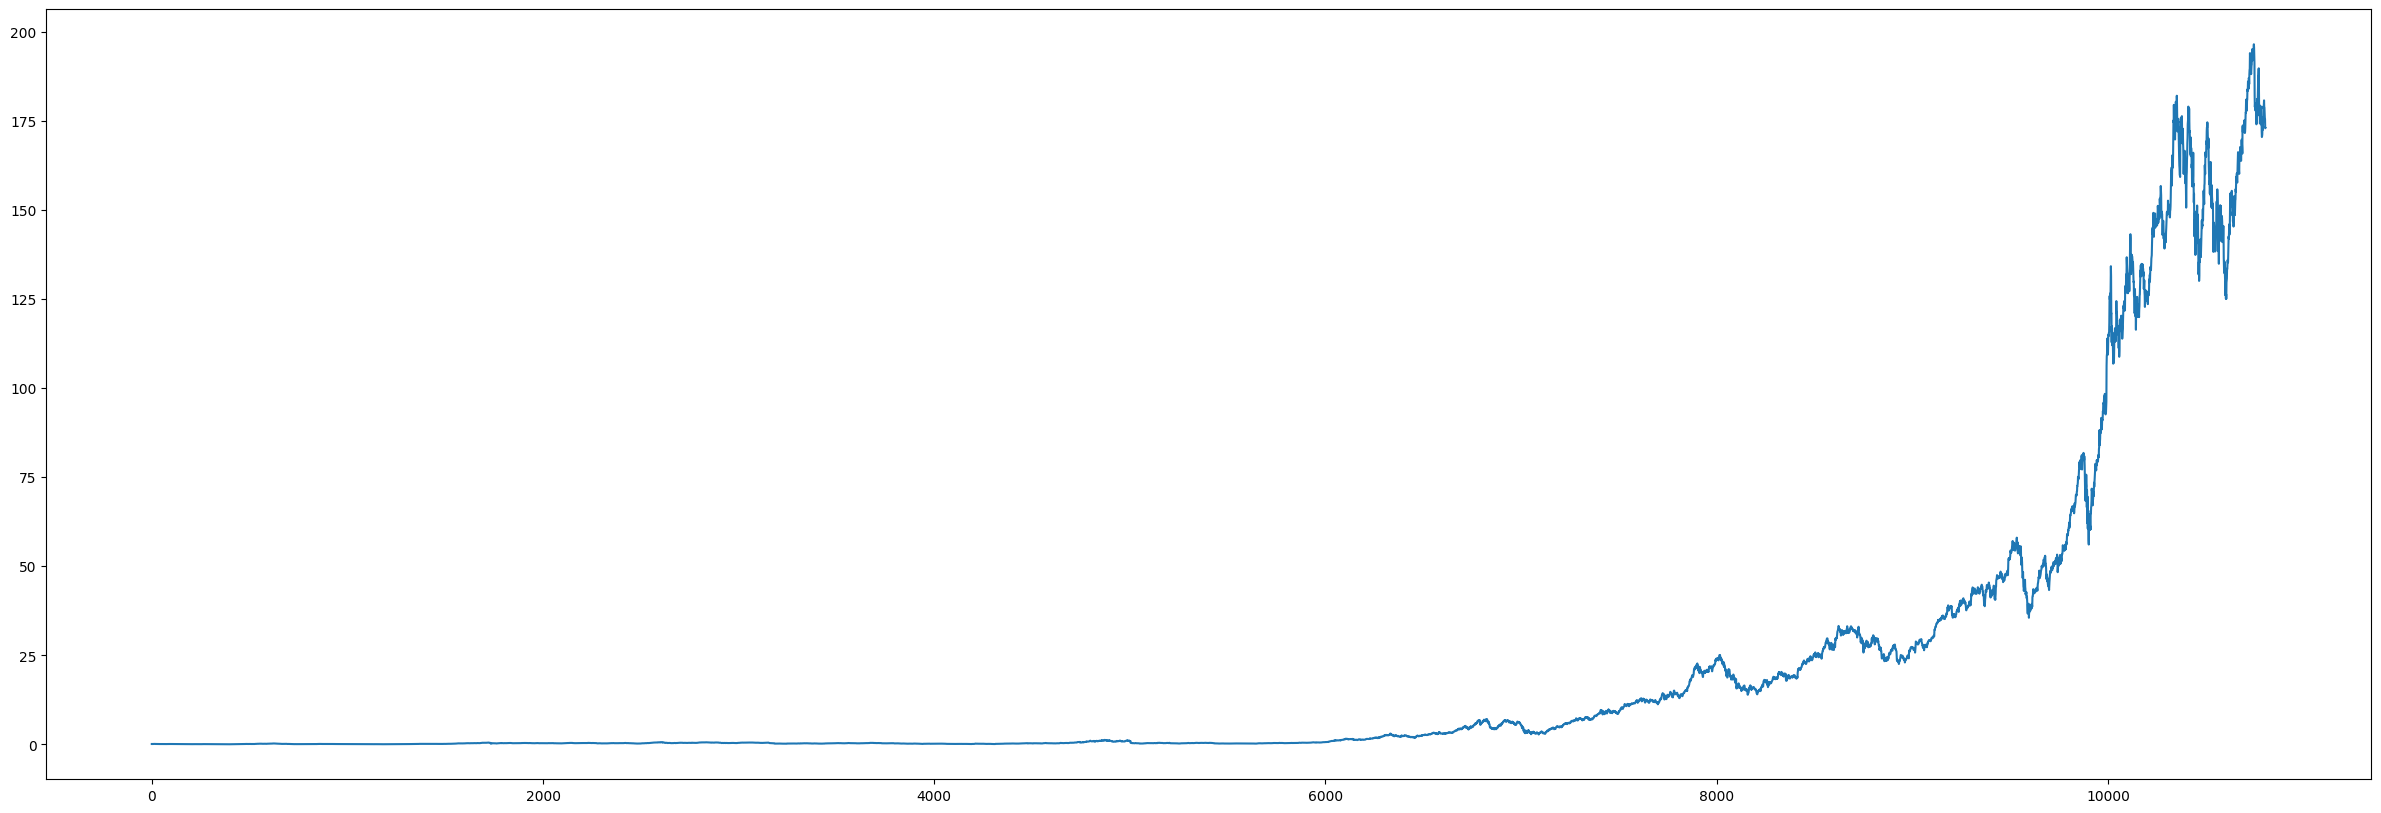

In [7]:
plt.figure(figsize=(30, 10))
plt.plot(df[['Close']])

In [8]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df[['Close']]  

X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]

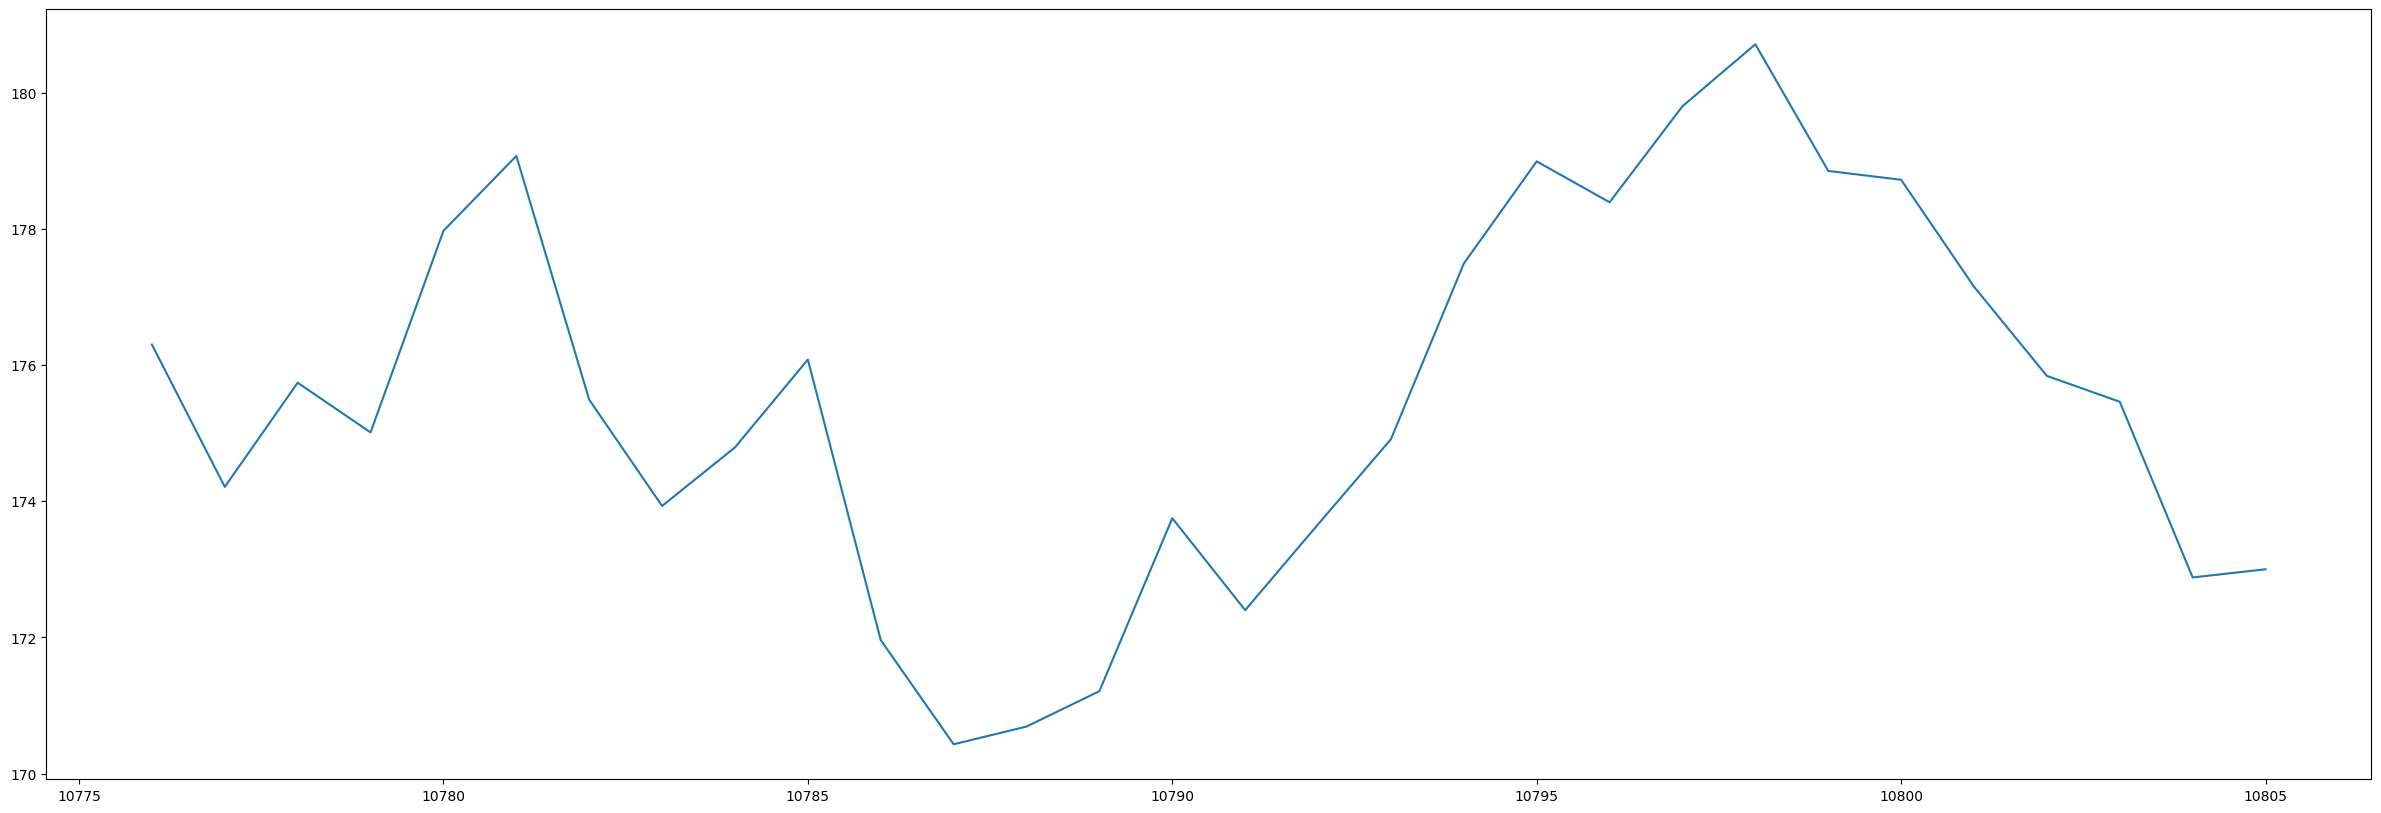

In [9]:
plt.figure(figsize=(30, 10))
plt.plot(y_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [12]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [13]:
lr_pred = lr.predict(X_test)
dtr_pred = dtr.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr_pred.flatten()

print(f'lr pred: {lr_pred[:5]}')
print(f'dtr pred: {dtr_pred[:5]}')
print(f'rf pred: {rf_pred[:5]}')
print(f'Actual Close: {y_test[["Close"]][:5]}')

lr pred: [176.21507127 175.09506525 175.40568009 174.30608437 178.65353924]
dtr pred: [174.919998 174.559998 175.429993 174.559998 178.960007]
rf pred: [176.40639944 174.90249928 175.35909773 174.85279919 178.02930263]
Actual Close:             Close
10776  176.300003
10777  174.210007
10778  175.740005
10779  175.009995
10780  177.970001


In [14]:
lr_score = lr.score(X_test,y_test)
dtr_score = dtr.score(X_test,y_test)
rf_score = rf.score(X_test,y_test)

print(f'lr score: {lr_score}')
print(f'dtr score: {dtr_score}')
print(f'rf score: {rf_score}')

lr score: 0.9327733644149443
dtr score: 0.8167612798401455
rf score: 0.891859826723058


In [15]:

mse_lr = mean_squared_error(y_test, lr_pred)
mse_dtr = mean_squared_error(y_test, dtr_pred)
mse_rf = mean_squared_error(y_test, rf_pred)

r2_lr = r2_score(y_test, lr_pred)
r2_dtr = r2_score(y_test, dtr_pred)
r2_rf = r2_score(y_test, rf_pred)

print("lr Mean Squared Error (MSE):", mse_lr)
print("lr R^2 Score:", r2_lr)
print("\n")

print("dtr Mean Squared Error (MSE):", mse_dtr)
print("dtr R^2 Score:", r2_dtr)
print("\n")

print("rf Mean Squared Error (MSE):", mse_rf)
print("rf R^2 Score:", r2_rf)

lr Mean Squared Error (MSE): 0.5122828925109792
lr R^2 Score: 0.9327733644149443


dtr Mean Squared Error (MSE): 1.3963224660370654
dtr R^2 Score: 0.8167612798401455


rf Mean Squared Error (MSE): 0.8240537441868535
rf R^2 Score: 0.891859826723058


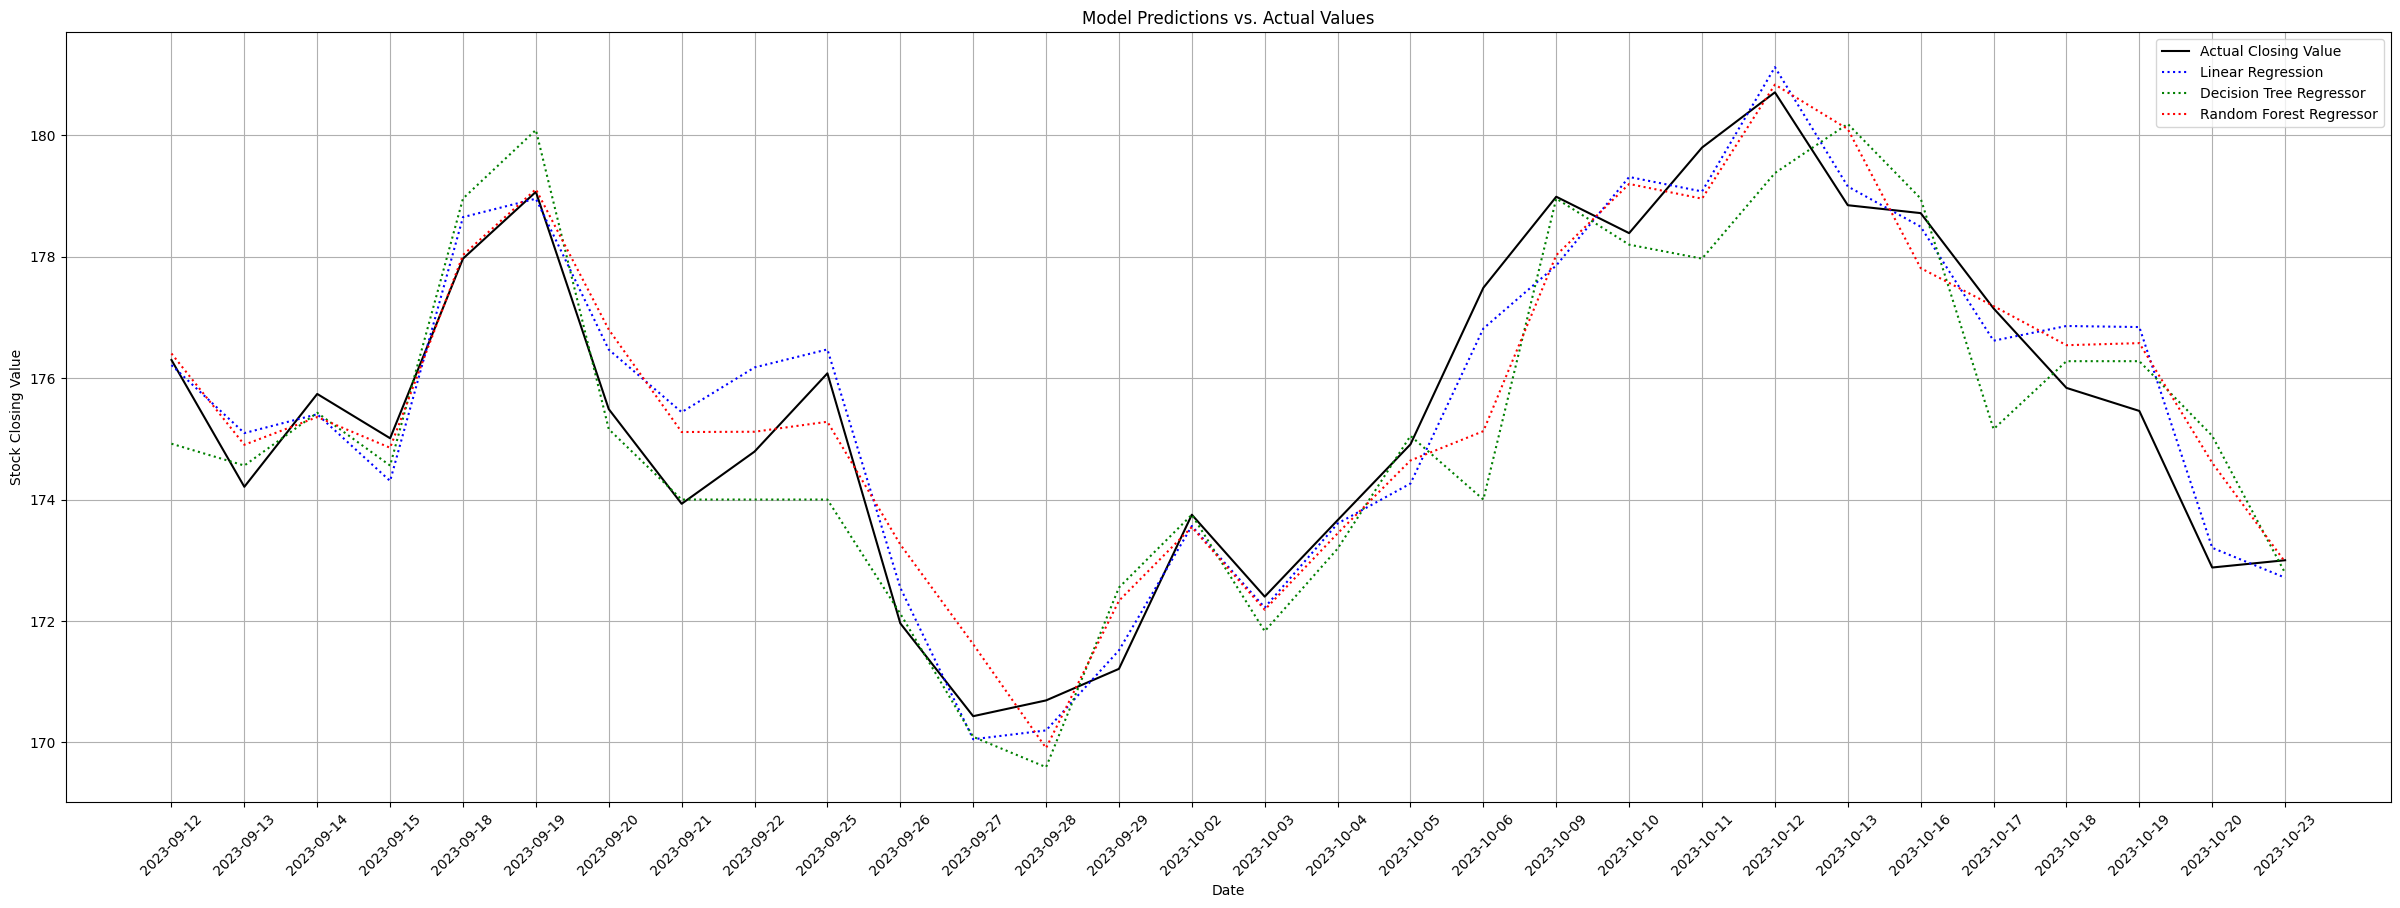

In [16]:
dates = df['Date']

plt.figure(figsize=(30, 10))

plt.plot(dates[-30:], y_test.values, label='Actual Closing Value', color='black')
plt.plot(dates[-30:], lr_pred, label='Linear Regression', color='blue', linestyle='dotted')
plt.plot(dates[-30:], dtr_pred, label='Decision Tree Regressor', color='green', linestyle='dotted')
plt.plot(dates[-30:], rf_pred, label='Random Forest Regressor', color='red', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Stock Closing Value')
plt.legend()
plt.title('Model Predictions vs. Actual Values')
plt.grid(True)  
plt.xticks(rotation=45) 
plt.show()

In [17]:
test_predict = [[169.02,171.17	,168.87,48350046]]

lr_pred_test = lr.predict(test_predict)
dtr_pred_test = dtr.predict(test_predict)
rf_pred_test = rf.predict(test_predict)

print(f'lr pred: {lr_pred_test}')
print(f'dtr pred: {dtr_pred_test}')
print(f'rf pred: {rf_pred_test}')

lr pred: [[170.68770644]]
dtr pred: [170.029999]
rf pred: [170.22669785]
